In [1]:
from signalTeste import *
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import wave
import time
import pickle
import peakutils
import scipy.signal as signal

In [2]:
import soundfile as sf

In [3]:
duration = 4  # seconds
fs = 48000

In [4]:
sd.default.samplerate = fs
sd.default.channels = 1
sig = signalMeu()

In [9]:
modulada = sd.rec(int(duration * fs))
sd.wait()

In [29]:
#sf.write('smnsh.wav', myrecording, fs)
modulada
sd.play(modulada)
sd.wait()

In [11]:
time, carrier = sig.generateSin(14000, 1,4,fs)

In [12]:
moduladaT = []
for i in modulada:
    moduladaT.append(i[0])

In [13]:
demodulada = np.multiply(carrier,moduladaT)

In [14]:
len(demodulada)

192000

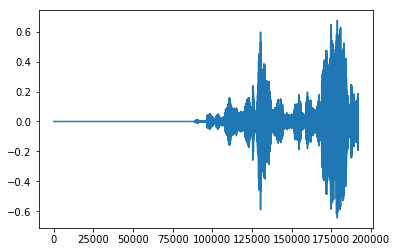

In [15]:
plt.plot(demodulada)
plt.show()

In [26]:
nyq_rate = fs/2
width = 5.0/nyq_rate
ripple_db = 60.0 #dB
N , beta = signal.kaiserord(ripple_db, width)
cutoff_hz = 4000.0
taps = signal.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
demodulada_filtrada = signal.lfilter(taps, 1.0, demodulada)*10000

In [27]:
sd.play(demodulada_filtrada)
sd.wait()

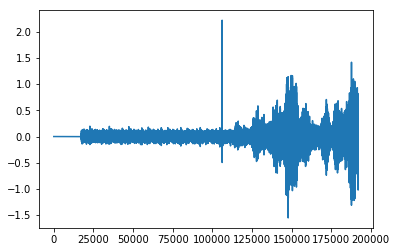

In [28]:
plt.plot(demodulada_filtrada)
plt.show()